In [2]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import pandas
import lsqfit
import gvar as gv

load the files

In [153]:
data = pandas.read_csv('simulation_production_run_on_ibm_nairobi_data=2022-09-12_3qubits_cbqi25b4fms1nkdes8fg.csv')
data2 = pandas.read_csv('[DD]simulation_production_run_on_ibm_nairobi_data=2022-09-12_3qubits_63067c74e9f73b717085437c.csv')
data3 = pandas.read_csv('Exactsoln-simulation_production_run_on_ibm_nairobi_data=2022-10-14_3qubits_cd4tsorfuj2huvlfn0qg.csv')

In [154]:
ddict = data2.to_dict()
ddict0 = data.to_dict()
ddict1 = data3.to_dict()

generate the readout correction matrix

In [155]:
len(ddict1['counts bare'])

3000

In [156]:
mats = np.zeros((3, 2, 2))
counts1 = eval(data2['counts bare'][1200])
counts2 = eval(data2['counts bare'][1201])
for key in counts1.keys():
    key2 = (np.binary_repr(int(key, 16), width=6))[:3]
    for j in range(3):
        if key2[j] == '0':
            mats[j, 0, 0] = counts1[key] / 2000
        else:
            mats[j, 0, 1] = counts1[key] / 2000
            
for key in counts2.keys():
    key2 = (np.binary_repr(int(key, 16), width=6))[:3]
    for j in range(3):
        if key2[j] == '0':
            mats[j, 1, 0] = counts2[key] / 2000
        else:
            mats[j, 1, 1] = counts2[key] / 2000
        
reflect_mat = np.identity(1)
for j in range(3):
    reflect_mat = np.kron(reflect_mat, np.linalg.inv(mats[j]))

generating all the data points needed to make the appropriate time evolution

In [169]:
rescalend_data = [[] for j in range(20)]
evolutionnd_data = [[] for j in range(20)]
rescalendro_data = [[] for j in range(20)]
evolutionndro_data = [[] for j in range(20)]

rescale_data = [[] for j in range(20)]
evolution_data = [[] for j in range(20)]
rescale_ro_data = [[] for j in range(20)]
evolution_ro_data = [[] for j in range(20)]

sim_data = [[] for j in range(50)]
sim_data_r = [[] for j in range(50)]

for i in range(1200):
    index1 = int(ddict['nt'][i]) - 1
#     print(index1)
#     print(ddict['sim type'][i])
#     if ddict['sim type'][i] == 'evolution':
    counts = ddict['counts bare'][i]
    op2 = np.array([1 if np.binary_repr(k, width=3)[::2].count('1') % 2 == 1 else 0 for k in range(8)])
    op = np.array([1 if np.binary_repr(k, width=3).count('1') % 2 == 0 else -1 for k in range(8)])
    op = op * op2
    counts = eval(counts)
    if (i // 30) % 2 == 0:
        value = 0
        vector = np.zeros(8)
        

        norm = 0
        for key in counts.keys():
            key2 = np.binary_repr(int(key, 16), width=3)
#             print(key2[::2].count('1'))
            if key2[::2].count('1') % 2 == 1:
                norm += counts[key]
                vector[int(key, 16)] += counts[key]
                if key2.count('1') % 2 == 0:
                    value += counts[key]
                else:
                    value -= counts[key]
        if norm == 0:
            evolution_data[index1].append(0)
        else:
            evolution_data[index1].append(value / norm)

#         for key in counts.keys():
#             key2 = np.binary_repr(int(key, 16), width=3)
#             vector[int(key, 16)] += counts[key]
#             if key2.count('1') % 2 == 0:
#                 value += counts[key]
#             else:
#                 value -= counts[key]
#             evolution_data[index1].append(value / sum(counts.values()))
        vector /= sum(counts.values())
        evolution_ro_data[index1].append(vector @ (op * vector))
    else:
        value = 0
        vector = np.zeros(8)
        for key in counts.keys():
            key2 = np.binary_repr(int(key, 16), width=3)
            vector[int(key, 16)] += counts[key]
            if key2.count('1') % 2 == 0:
                value += counts[key]
            else:
                value -= counts[key]
            rescale_data[index1].append(value / sum(counts.values()))
        vector /= sum(counts.values())
        rescale_ro_data[index1].append(vector @ (op * vector))
#     break

    index1 = int(ddict0['nt'][i]) - 1
    counts = ddict0['counts mitigated'][i]
    op = np.array([1 if np.binary_repr(k, width=3).count('1') % 2 == 0 else 0 for k in range(8)])
    counts = eval(counts)
    if (i // 30) % 2 == 0:
        value = 0
        vector = np.zeros(8)

        norm = 0
        for key in counts.keys():
            key2 = np.binary_repr(int(key, 16), width=3)
#             print(key2[::2].count('1'))
            if key2[::2].count('1') % 2 == 1:
                norm += counts[key]
                vector[int(key, 16)] += counts[key]
                if key2.count('1') % 2 == 0:
                    value += counts[key]
                else:
                    value -= counts[key]
        if norm == 0:
            evolutionnd_data[index1].append(0)
        else:
            evolutionnd_data[index1].append(value / norm)
    else:
        value = 0
        vector = np.zeros(8)
        for key in counts.keys():
            key2 = np.binary_repr(int(key, 16), width=3)
            vector[int(key, 16)] += counts[key]
            if key2.count('1') % 2 == 0:
                value += counts[key]
            else:
                value -= counts[key]
            rescalend_data[index1].append(value / sum(counts.values()))
            
            
    index1 = int(ddict0['nt'][i]) - 1
    counts = ddict0['counts bare'][i]
    op = np.array([1 if np.binary_repr(k, width=3).count('1') % 2 == 0 else 0 for k in range(8)])
    counts = eval(counts)
    if (i // 30) % 2 == 0:
        value = 0
        vector = np.zeros(8)

        for key in counts.keys():
            key2 = np.binary_repr(int(key, 16), width=3)
            vector[int(key, 16)] += counts[key]
            if key2.count('1') % 2 == 0:
                value += counts[key]
            else:
                value -= counts[key]
            evolutionndro_data[index1].append(value / sum(counts.values()))
    else:
        value = 0
        vector = np.zeros(8)
        for key in counts.keys():
            key2 = np.binary_repr(int(key, 16), width=3)
            vector[int(key, 16)] += counts[key]
            if key2.count('1') % 2 == 0:
                value += counts[key]
            else:
                value -= counts[key]
            rescalendro_data[index1].append(value / sum(counts.values()))
            
            
for i in range(3000):           
    index1 = int(ddict1['nt'][i]) - 1
    counts = ddict1['counts mitigated'][i]
    op = np.array([1 if np.binary_repr(k, width=3).count('1') % 2 == 0 else 0 for k in range(8)])
    counts = eval(counts)
    if (i // 30) % 2 == 0:
        value = 0
        vector = np.zeros(8)

        norm = 0
        for key in counts.keys():
            key2 = np.binary_repr(int(key, 16), width=3)
#             print(key2[::2].count('1'))
            if key2[::2].count('1') % 2 == 1:
                norm += counts[key]
                vector[int(key, 16)] += counts[key]
                if key2.count('1') % 2 == 0:
                    value += counts[key]
                else:
                    value -= counts[key]
        if norm == 0:
            sim_data[index1].append(0)
        else:
            sim_data[index1].append(value / norm)
    else:
        value = 0
        vector = np.zeros(8)
        for key in counts.keys():
            key2 = np.binary_repr(int(key, 16), width=3)
            vector[int(key, 16)] += counts[key]
            if key2.count('1') % 2 == 0:
                value += counts[key]
            else:
                value -= counts[key]
            sim_data_r[index1].append(value / sum(counts.values()))
    
#     break
evolution_data = np.array(evolution_data).transpose()
rescale_data = np.array(rescale_data).transpose()
evolutionnd_data = np.array(evolutionnd_data).transpose()
rescalend_data = np.array(rescalend_data).transpose()
evolutionndro_data = np.array(evolutionndro_data).transpose()
rescalendro_data = np.array(rescalendro_data).transpose()
evolution_ro_data = np.array(evolution_ro_data).transpose()
rescale_ro_data = np.array(rescale_ro_data).transpose()
sim_data = np.array(sim_data).transpose()
sim_data_r = np.array(sim_data_r).transpose()

In [171]:
colorsrgb = [(0, 0, 0), (230, 159, 0), (86, 180, 233),
          (0, 158, 115), (0,189,139), (0, 114, 178),
          (213, 94, 0), (204, 121, 167)]
colors = [tuple([el / 255 for el in c]) for c in colorsrgb]

import matplotlib as mpl
from  matplotlib import rc
import matplotlib.pyplot as plt

mpl.rcParams["font.family"] = "serif"
mpl.rcParams["font.serif"] = "Times New Roman"
mpl.rcParams.keys()
# mpl.rcParams["text.fontset"] = "Times New Roman"
mpl.rcParams["mathtext.fontset"] = "stix"
# rc('text', usetex=True)

plt.rcParams["figure.figsize"] = (10,7)
plt.rcParams["figure.dpi"] = (200)
plt.rcParams['xtick.labelsize'] = (12) 
plt.rcParams['ytick.labelsize'] = (12)
plt.rcParams["text.usetex"] = True

In [172]:
rdata = gv.gvar(np.mean(rescale_data, axis=0), np.std(rescale_data, axis=0) / np.sqrt(30))
edata = gv.gvar(np.mean(evolution_data, axis=0), np.std(evolution_data, axis=0) / np.sqrt(30))
rdatand = gv.gvar(np.mean(rescalend_data, axis=0), np.std(rescalend_data, axis=0) / np.sqrt(30))
edatand = gv.gvar(np.mean(evolutionnd_data, axis=0), np.std(evolutionnd_data, axis=0) / np.sqrt(30))
edataro = gv.gvar(evolutionnd_data[7], np.sqrt((1 - evolutionnd_data[7] ** 2) / 2000))
rdatandro = gv.gvar(np.mean(rescalendro_data, axis=0), np.std(rescalendro_data, axis=0) / np.sqrt(30))
edatandro = gv.gvar(np.mean(evolutionndro_data, axis=0), np.std(evolutionndro_data, axis=0) / np.sqrt(30))
edatanothing = gv.gvar(evolutionndro_data[0], np.sqrt((1 - evolutionndro_data[0] ** 2) / 2000))
r_ro_data = gv.gvar(np.mean(rescale_ro_data, axis=0), np.std(rescale_ro_data, axis=0) / np.sqrt(30))
e_ro_data = gv.gvar(np.mean(evolution_ro_data, axis=0), np.std(evolution_ro_data, axis=0) / np.sqrt(30))

sim = gv.gvar(np.mean(sim_data, axis=0), np.std(sim_data, axis=0) / np.sqrt(30))
sim_r = gv.gvar(np.mean(sim_data_r, axis=0), np.std(sim_data_r, axis=0) / np.sqrt(30))

In [173]:
edata_r = edata / rdata
edatand_r = edatandro / rdatandro
e_ro_data_r = e_ro_data / r_ro_data
sim_resc = sim/sim_r

In [291]:
p1 = {'A_1':1,'B_1':1,'C_1':0}
p2 = {'A_1':1,'B_1':1,'C_1':0,'A_2':1,'B_2':1,'C_2':0}
p3 = {'A_1':1,'B_1':1,'C_1':0,'A_2':0.5,'B_2':1,'C_2':0,'A_3':0.5,'B_3':1,'C_3':0}

cosine1 = lambda x, p: [p['A_1'] * np.cos(p['B_1'] * x[i] + p['C_1'])
                       for i in range(len(x))]
cosine2 = lambda x, p: [p['A_1'] * np.cos(p['B_1'] * x[i] + p['C_1'])
                        + p['A_2'] * np.cos(p['B_2'] * x[i] + p['C_2'])
                       for i in range(len(x))]
cosine3 = lambda x, p: [p['A_1'] * np.cos(p['B_1'] * x[i] + p['C_1'])
                        + p['A_2'] * np.cos(p['B_2'] * x[i] + p['C_2'])
                        + p['A_3'] * np.cos(p['B_3'] * x[i] + p['C_3'])
                       for i in range(len(x))]
x = range(20)

fit0 = lsqfit.nonlinear_fit(data=(np.linspace(1, 20, 50),sim), 
                        p0=p1, fcn=cosine1, debug=True)
fit1 = lsqfit.nonlinear_fit(data=(x,e_ro_data_r[:len(x)]), 
                        p0=p1, fcn=cosine1, debug=True)
fit2 = lsqfit.nonlinear_fit(data=(x,e_ro_data_r[:len(x)]), 
                        p0=p2, fcn=cosine2, debug=True)
fit3 = lsqfit.nonlinear_fit(data=(x,e_ro_data_r[:len(x)]), 
                        p0=p3, fcn=cosine3, debug=True)
fits = [fit1,fit2,fit3,fit0]


print(fit3)

labls = ["Fit "+str(i+1)+": ${\chi}^2/[dof]$ = "+str.format('{0:.3f}', fits[i].chi2/(len(x))) for i in range(3)]
labls.append("Fit "+str(0)+": ${\chi}^2/[dof]$ = "+str.format('{0:.3f}', fits[3].chi2/(len(np.linspace(1, 20, 50)))))

print("Fit Parameters:")
print("Frequency 'Exact': w = " + str(fit0.p['B_1']))
print("Frequency from Fit 1: w = " + str(fit1.p['B_1']))
print("Frequencies from Fit 2: w1 = " + str(fit2.p['B_1'])+" w2 = "+str(fit2.p['B_2']))
print("Frequencies from Fit 3: w1 = " + str(fit3.p['B_1'])+" w2 = "+str(fit3.p['B_2'])+" w3 = "+str(fit3.p['B_3']))

Least Square Fit (no prior):
  chi2/dof [dof] = 11 [11]    Q = 7.4e-21    

Parameters:
            A_1    0.6750 (84)      [   1 +- inf ]  
            B_1    0.9187 (22)      [   1 +- inf ]  
            C_1     0.773 (21)      [   0 +- inf ]  
            A_2   -0.3226 (82)      [ 0.5 +- inf ]  
            B_2   -0.1949 (38)      [   1 +- inf ]  
            C_2    -1.491 (41)      [   0 +- inf ]  
            A_3    0.0384 (75)      [ 0.5 +- inf ]  
            B_3     3.698 (36)      [   1 +- inf ]  
            C_3      0.16 (36)      [   0 +- inf ]  

Settings:
  svdcut/n = 1e-12/0    tol = (1e-08,1e-10,1e-10*)    (itns/time = 36/0.0)
  fitter = scipy_least_squares    method = trf

Fit Parameters:
Frequency 'Exact': w = 0.94220(15)
Frequency from Fit 1: w = 0.9073(21)
Frequencies from Fit 2: w1 = 0.9173(22) w2 = 0.1927(38)
Frequencies from Fit 3: w1 = 0.9187(22) w2 = -0.1949(38) w3 = 3.698(36)


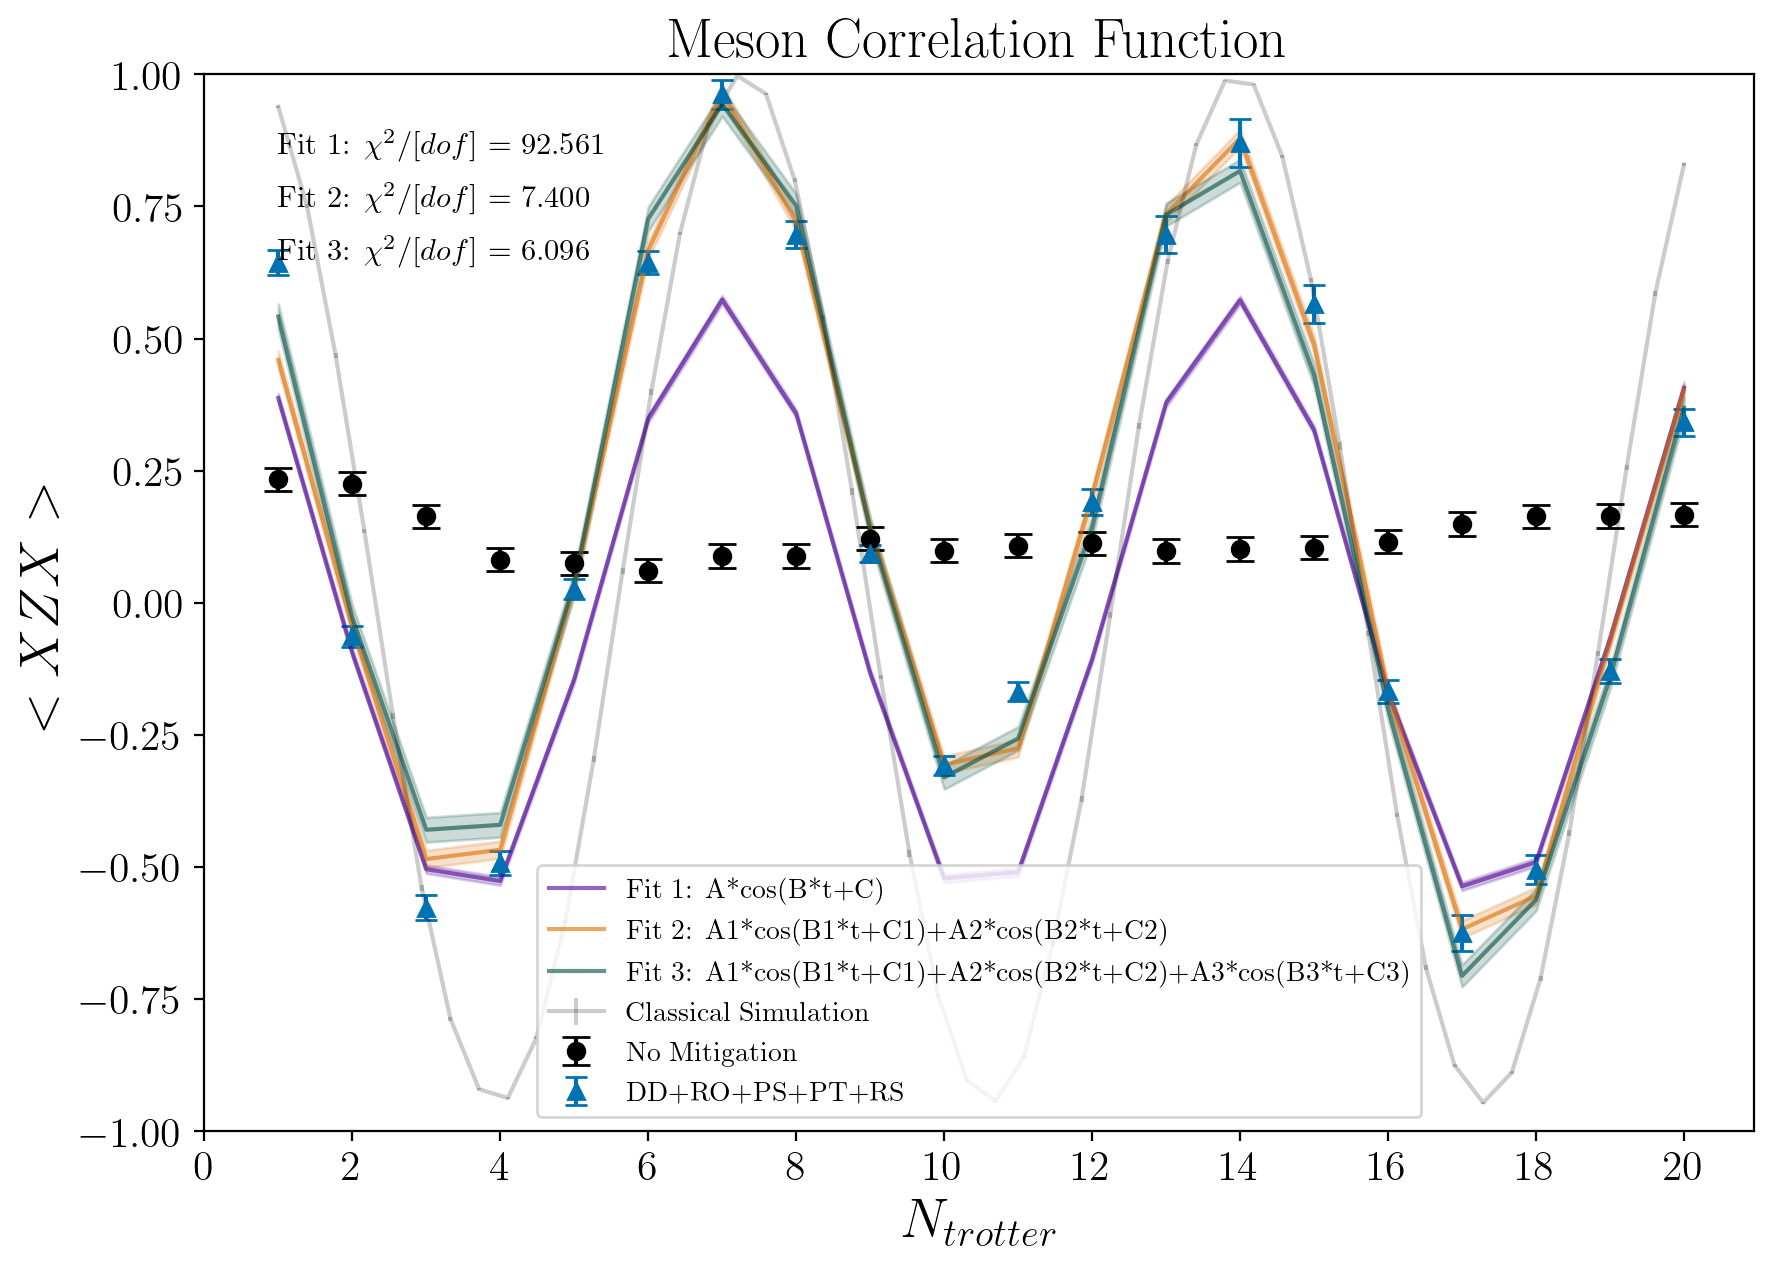

In [294]:
plt.errorbar(np.linspace(1, 20, 50), gv.mean(sim), yerr=gv.sdev(sim), color='k', capsize=0,
             label='Classical Simulation', alpha=0.2)
plt.errorbar(np.linspace(1, 20, 20), gv.mean(edatanothing), yerr=gv.sdev(edatanothing), fmt='o', color=colors[0], capsize=5,
             label='No Mitigation')
# plt.errorbar(np.linspace(1, 20, 20), gv.mean(edataro), yerr=gv.sdev(edataro), fmt='d', color=colors[1], capsize=5,
#              label='RO + PS')
# plt.errorbar(np.linspace(1, 20, 20), gv.mean(edatand), yerr=gv.sdev(edatand), fmt='s', color=colors[2], capsize=5,
#              label='RO + PS + PT')
# plt.errorbar(np.linspace(1, 20, 20), gv.mean(edatand_r), yerr=gv.sdev(edatand_r), fmt='x', 
#              color=colors[3], capsize=4, label='RO+PS+PT+RS')
# plt.errorbar(np.linspace(1, 20, 20), gv.mean(e_ro_data), yerr=gv.sdev(e_ro_data), fmt='^', 
#              color='#D81B60', capsize=4, label='DD+RO+PS+PT')
plt.errorbar(np.linspace(1, 20, 20), gv.mean(e_ro_data_r), yerr=gv.sdev(e_ro_data_r), fmt='^', 
             color=colors[5], capsize=4, label='DD+RO+PS+PT+RS')
# plt.errorbar(np.linspace(1, 20, 20), gv.mean(edata_r), yerr=gv.sdev(edata_r), fmt='d',
#              fillstyle='none', capsize=4, label='DD+PT+RS')

for i in range(3):
    plt.annotate(labls[i], xy=(1,0.85-(0.10*i)),fontsize=11,color='k')

plt.plot(np.linspace(1, 20, 20),
         [gv.mean(fit1.p['A_1'])*np.cos(gv.mean(fit1.p['B_1'])*i + gv.mean(fit1.p['C_1'])) for i in range(20)],
         color='#490092',alpha=0.6, label='Fit 1: A*cos(B*t+C)')
plt.plot(np.linspace(1, 20, 20),
         [gv.mean(fit2.p['A_1'])*np.cos(gv.mean(fit2.p['B_1'])*i + gv.mean(fit2.p['C_1']))
          + gv.mean(fit2.p['A_2'])*np.cos(gv.mean(fit2.p['B_2'])*i + gv.mean(fit2.p['C_2'])) for i in range(20)],
          color = '#db6d00',alpha=0.6, label='Fit 2: A1*cos(B1*t+C1)+A2*cos(B2*t+C2)')
plt.plot(np.linspace(1, 20, 20),
         [gv.mean(fit3.p['A_1'])*np.cos(gv.mean(fit3.p['B_1'])*i + gv.mean(fit3.p['C_1']))
          + gv.mean(fit3.p['A_2'])*np.cos(gv.mean(fit3.p['B_2'])*i + gv.mean(fit2.p['C_2']))
          + gv.mean(fit3.p['A_3'])*np.cos(gv.mean(fit3.p['B_3'])*i + gv.mean(fit3.p['C_3'])) for i in range(20)],
          color = '#004D40',alpha=0.6, label='Fit 3: A1*cos(B1*t+C1)+A2*cos(B2*t+C2)+A3*cos(B3*t+C3)')

plt.fill_between(np.linspace(1, 20, 20), [gv.mean(fit1.p['A_1'])*np.cos(gv.mean(fit1.p['B_1'])*i + gv.mean(fit1.p['C_1'])) -
                                          gv.sdev(fit1.p['A_1'])*np.cos(gv.sdev(fit1.p['B_1'])*i + gv.sdev(fit1.p['C_1'])) for i in range(20)], 
                                         [gv.mean(fit1.p['A_1'])*np.cos(gv.mean(fit1.p['B_1'])*i + gv.mean(fit1.p['C_1'])) +
                                          gv.sdev(fit1.p['A_1'])*np.cos(gv.sdev(fit1.p['B_1'])*i + gv.sdev(fit1.p['C_1'])) for i in range(20)],alpha=0.2, color='#490092')
plt.fill_between(np.linspace(1, 20, 20), [gv.mean(fit2.p['A_1'])*np.cos(gv.mean(fit2.p['B_1'])*i + gv.mean(fit2.p['C_1'])) + 
                                          gv.mean(fit2.p['A_2'])*np.cos(gv.mean(fit2.p['B_2'])*i + gv.mean(fit2.p['C_2'])) -
                                          gv.sdev(fit2.p['A_1'])*np.cos(gv.sdev(fit2.p['B_1'])*i + gv.sdev(fit2.p['C_1'])) - 
                                          gv.sdev(fit2.p['A_2'])*np.cos(gv.sdev(fit2.p['B_2'])*i + gv.sdev(fit2.p['C_2']))for i in range(20)], 
                                         [gv.mean(fit2.p['A_1'])*np.cos(gv.mean(fit2.p['B_1'])*i + gv.mean(fit2.p['C_1'])) + 
                                          gv.mean(fit2.p['A_2'])*np.cos(gv.mean(fit2.p['B_2'])*i + gv.mean(fit2.p['C_2'])) +
                                          gv.sdev(fit2.p['A_1'])*np.cos(gv.sdev(fit2.p['B_1'])*i + gv.sdev(fit2.p['C_1'])) +
                                          gv.sdev(fit2.p['A_2'])*np.cos(gv.sdev(fit2.p['B_2'])*i + gv.sdev(fit2.p['C_2']))for i in range(20)],alpha=0.2, color='#db6d00')
plt.fill_between(np.linspace(1, 20, 20), [gv.mean(fit3.p['A_1'])*np.cos(gv.mean(fit3.p['B_1'])*i + gv.mean(fit3.p['C_1'])) +
                                          gv.mean(fit3.p['A_2'])*np.cos(gv.mean(fit3.p['B_2'])*i + gv.mean(fit2.p['C_2'])) +
                                          gv.mean(fit3.p['A_3'])*np.cos(gv.mean(fit3.p['B_3'])*i + gv.mean(fit3.p['C_3'])) - 
                                          gv.sdev(fit3.p['A_1'])*np.cos(gv.sdev(fit3.p['B_1'])*i + gv.sdev(fit3.p['C_1'])) - 
                                          gv.sdev(fit3.p['A_2'])*np.cos(gv.sdev(fit3.p['B_2'])*i + gv.sdev(fit3.p['C_2'])) -
                                          gv.sdev(fit3.p['A_3'])*np.cos(gv.sdev(fit3.p['B_3'])*i + gv.sdev(fit3.p['C_3']))for i in range(20)], 
                                         [gv.mean(fit3.p['A_1'])*np.cos(gv.mean(fit3.p['B_1'])*i + gv.mean(fit3.p['C_1'])) +
                                          gv.mean(fit3.p['A_2'])*np.cos(gv.mean(fit3.p['B_2'])*i + gv.mean(fit2.p['C_2'])) +
                                          gv.mean(fit3.p['A_3'])*np.cos(gv.mean(fit3.p['B_3'])*i + gv.mean(fit3.p['C_3'])) + 
                                          gv.sdev(fit3.p['A_1'])*np.cos(gv.sdev(fit3.p['B_1'])*i + gv.sdev(fit3.p['C_1'])) + 
                                          gv.sdev(fit3.p['A_2'])*np.cos(gv.sdev(fit3.p['B_2'])*i + gv.sdev(fit3.p['C_2'])) +
                                          gv.sdev(fit3.p['A_3'])*np.cos(gv.sdev(fit3.p['B_3'])*i + gv.sdev(fit3.p['C_3']))for i in range(20)],alpha=0.2, color='#004D40')


plt.ylim(-1, 1)
plt.xticks(np.arange(0, 21, step=2),size=15)
plt.yticks(np.arange(-1, 1.25, step=0.25),size=15)
plt.xlabel('$N_{trotter}$',size=20)
plt.ylabel(r'$<XZX>$',size=20)
plt.title('Meson Correlation Function',size=20)
plt.legend()
plt.savefig('normantestdd+readoutcorrection.pdf')

In [295]:
labls

['Fit 1: ${\\chi}^2/[dof]$ = 92.561',
 'Fit 2: ${\\chi}^2/[dof]$ = 7.400',
 'Fit 3: ${\\chi}^2/[dof]$ = 6.096',
 'Fit 0: ${\\chi}^2/[dof]$ = 118.206']